In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress
from datetime import datetime

In [2]:
#Loading data from CSV into a DataFrame
data = pd.read_csv("dog_rates_tweets.csv", parse_dates = True)
print(data)

                       id           created_at  \
0      994677639364403200  2018-05-10 20:36:44   
1      994364904978239488  2018-05-09 23:54:02   
2      994363623421153280  2018-05-09 23:48:56   
3      994336722875047936  2018-05-09 22:02:03   
4      994024065982717952  2018-05-09 01:19:40   
...                   ...                  ...   
8510  1027980978910687233  2018-08-10 18:12:18   
8511  1027976875811819520  2018-08-10 17:56:00   
8512  1027970381766963202  2018-08-10 17:30:12   
8513  1027967697684815873  2018-08-10 17:19:32   
8514  1027963039029452800  2018-08-10 17:01:01   

                                                   text  
0                  @Steff88979267 tell them to h*ck off  
1                             @NFLOwnerGBP take it back  
2     This is Louie. He has misplaced his Cheerio. W...  
3                                   @rachaellanaghan ❤️  
4     This is Captain Jack Wobbles. He is currently ...  
...                                                

We are mostly interested in the created_at and text columns. The regular expression for $n$/10 is given below:

In [3]:
reExpression = r'(\d+(\.\d+)?)/10'

In [4]:
ratings = pd.Series(data['text']).str.extract(reExpression)
print(ratings)

        0    1
0     NaN  NaN
1     NaN  NaN
2      14  NaN
3     NaN  NaN
4     NaN  NaN
...   ...  ...
8510  NaN  NaN
8511  NaN  NaN
8512  NaN  NaN
8513  NaN  NaN
8514  NaN  NaN

[8515 rows x 2 columns]


The first column has the ratings. Tweets with no ratings have a NaN value.

In [5]:
#Appending the ratings column to the data
data['rating'] = data['text'].str.extract(reExpression)[0]
print(data['rating'])

0       NaN
1       NaN
2        14
3       NaN
4       NaN
       ... 
8510    NaN
8511    NaN
8512    NaN
8513    NaN
8514    NaN
Name: rating, Length: 8515, dtype: object


In [6]:
#Dropping any rows with NaN rating
dataWithRatings = data.dropna(how="any")
print(dataWithRatings)

                       id           created_at  \
2      994363623421153280  2018-05-09 23:48:56   
7      993889039714578432  2018-05-08 16:23:07   
8      993629544463642624  2018-05-07 23:11:58   
24     992198572664860672  2018-05-04 00:25:48   
30     991744041351090177  2018-05-02 18:19:39   
...                   ...                  ...   
7363  1032725635888803841  2018-08-23 20:25:53   
7369  1032310288652152832  2018-08-22 16:55:26   
7381  1031696422813544448  2018-08-21 00:16:09   
7431  1029767403545288706  2018-08-15 16:30:55   
7433  1029550934408486912  2018-08-15 02:10:45   

                                                   text rating  
2     This is Louie. He has misplaced his Cheerio. W...     14  
7     This is Manny. He hasn’t seen your croissant. ...     13  
8     This is Libby. She leap. 14/10\n(IG: libbythef...     14  
24    This is Rosie. She thought Coachella was this ...     13  
30    This is Riley. He’ll be your chauffeur this ev...     13  
...      

In [7]:
#Convert ratings from string to float
dataWithRatings['rating'] = dataWithRatings['rating'].apply(float)
#Dropping any rows with ratings higher than 25
dataWithRatings = dataWithRatings[dataWithRatings['rating'] < 26]
#Changing created_at object type to datetiem
dataWithRatings['created_at'] = pd.to_datetime(dataWithRatings['created_at'])
print(dataWithRatings)

                       id          created_at  \
2      994363623421153280 2018-05-09 23:48:56   
7      993889039714578432 2018-05-08 16:23:07   
8      993629544463642624 2018-05-07 23:11:58   
24     992198572664860672 2018-05-04 00:25:48   
30     991744041351090177 2018-05-02 18:19:39   
...                   ...                 ...   
7363  1032725635888803841 2018-08-23 20:25:53   
7369  1032310288652152832 2018-08-22 16:55:26   
7381  1031696422813544448 2018-08-21 00:16:09   
7431  1029767403545288706 2018-08-15 16:30:55   
7433  1029550934408486912 2018-08-15 02:10:45   

                                                   text  rating  
2     This is Louie. He has misplaced his Cheerio. W...    14.0  
7     This is Manny. He hasn’t seen your croissant. ...    13.0  
8     This is Libby. She leap. 14/10\n(IG: libbythef...    14.0  
24    This is Rosie. She thought Coachella was this ...    13.0  
30    This is Riley. He’ll be your chauffeur this ev...    13.0  
...            

/tmp/ipykernel_113/1925712841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithRatings['rating'] = dataWithRatings['rating'].apply(float)


In [8]:
dataWithRatings['timestamp'] = dataWithRatings['created_at'].apply(datetime.timestamp)

In [9]:
model = linregress(dataWithRatings['timestamp'], dataWithRatings['rating'])

## Ratings time series

In [10]:
prediction = model[0] * dataWithRatings['timestamp'] +  model[1]
dataWithRatings['prediction'] = prediction

In [11]:
dataWithRatings

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [12]:
model.slope, model.intercept

(3.515929974847721e-08, -40.46415480898916)

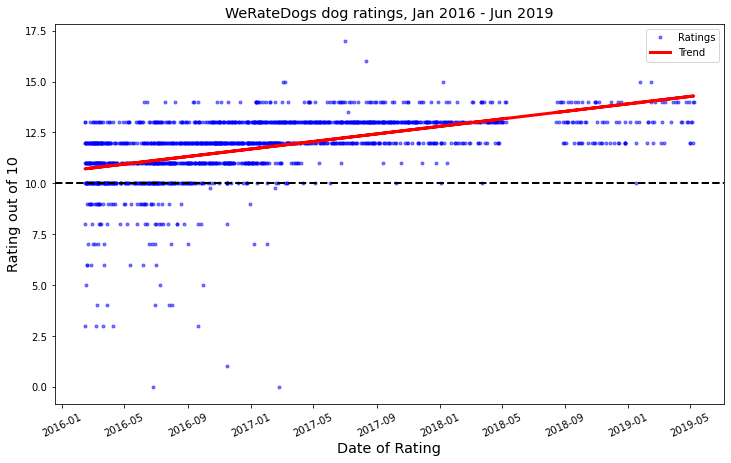

In [13]:
plt.figure(figsize=(12,7))
plt.plot(dataWithRatings['created_at'], dataWithRatings['rating'], 'b.', label='Ratings', alpha=0.5)
plt.plot(dataWithRatings['created_at'], prediction, 'r-', linewidth=3, label = "Trend")
plt.xticks(rotation=25)
plt.xlabel("Date of Rating", size = 'x-large')
plt.ylabel("Rating out of 10", size = 'x-large')
plt.title("WeRateDogs dog ratings, Jan 2016 - Jun 2019", size = 'x-large')
plt.axhline(y=10, color='black', linestyle='--', linewidth = 2)
plt.legend()
plt.show()